## 1) Importando bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from lightgbm import LGBMClassifier

## 2) Importando os arquivos

In [2]:
sample_data = pd.read_csv(r'C:\Users\wpett\OneDrive\Desktop\UFRJ\2024.1\Mineração de Dados - Zimbrão\sample_submission.csv')
train_data = pd.read_csv(r'C:\Users\wpett\OneDrive\Desktop\UFRJ\2024.1\Mineração de Dados - Zimbrão\train.csv')
test_data = pd.read_csv(r'C:\Users\wpett\OneDrive\Desktop\UFRJ\2024.1\Mineração de Dados - Zimbrão\test.csv')

data = {
    "model": [],
    "train_score": [],
    "test_score": [],
}

used_models = pd.DataFrame(columns=data)

## 3) Analisando os arquivos lidos

In [3]:
train_data.shape, test_data.shape, sample_data.shape

((20758, 18), (13840, 17), (13840, 2))

In [4]:
train_data.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [5]:
train_data.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5992.46278,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,0.00000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,10378.50000,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,15567.75000,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,20757.00000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13840 entries, 0 to 13839
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              13840 non-null  int64  
 1   Gender                          13840 non-null  object 
 2   Age                             13840 non-null  float64
 3   Height                          13840 non-null  float64
 4   Weight                          13840 non-null  float64
 5   family_history_with_overweight  13840 non-null  object 
 6   FAVC                            13840 non-null  object 
 7   FCVC                            13840 non-null  float64
 8   NCP                             13840 non-null  float64
 9   CAEC                            13840 non-null  object 
 10  SMOKE                           13840 non-null  object 
 11  CH2O                            13840 non-null  float64
 12  SCC                             

## 4) Renomeando colunas

In [8]:
def rename_columns(data, names):
    data.rename(columns=names, inplace=True)
    return data

columns_names = {
    "Gender": "gender",
    "Age": "age",
    "Height": "height",
    "Weight": "weight",
    "family_history_with_overweight": "family_history",
    "FAVC": "frequency_high_caloric_food",
    "FCVC": "frequency_vegetables",
    "NCP": "main_meals",
    "CAEC": "eating_out_main_meals",
    "SMOKE": "smoking",
    "CH2O": "water_daily",
    "SCC": "calories_monitoring",
    "FAF": "physical_activity",
    "TUE": "technology_use",
    "CALC": "alcohol",
    "MTRANS": "transportation",
    "NObeyesdad": "obesity"
}

train_data = rename_columns(train_data, columns_names)

In [9]:
columns_names.pop("NObeyesdad")
test_data = rename_columns(test_data, columns_names)

In [10]:
display(train_data)

,id,gender,age,height,weight,family_history,frequency_high_caloric_food,frequency_vegetables,main_meals,eating_out_main_meals,smoking,water_daily,calories_monitoring,physical_activity,technology_use,alcohol,transportation,obesity
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20754,20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
20755,20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II
20756,20756,Male,33.852953,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile,Overweight_Level_II


In [11]:
display(test_data)

,id,gender,age,height,weight,family_history,frequency_high_caloric_food,frequency_vegetables,main_meals,eating_out_main_meals,smoking,water_daily,calories_monitoring,physical_activity,technology_use,alcohol,transportation
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13835,34593,Male,23.327836,1.721384,78.030383,yes,no,2.813234,3.000000,Sometimes,no,1.000000,no,0.807076,0.778632,Sometimes,Public_Transportation
13836,34594,Female,29.000000,1.590000,62.000000,no,yes,3.000000,3.000000,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation
13837,34595,Female,22.935612,1.585547,44.376637,no,yes,3.000000,2.273740,Frequently,no,2.000000,no,1.949840,1.000000,Sometimes,Public_Transportation
13838,34596,Male,21.000000,1.620000,53.000000,yes,yes,2.000000,3.000000,Sometimes,no,2.000000,no,3.000000,2.000000,no,Public_Transportation


## 5) Verificando a presença de valores faltantes

In [12]:
train_data.isnull().sum()

id                             0
gender                         0
age                            0
height                         0
weight                         0
family_history                 0
frequency_high_caloric_food    0
frequency_vegetables           0
main_meals                     0
eating_out_main_meals          0
smoking                        0
water_daily                    0
calories_monitoring            0
physical_activity              0
technology_use                 0
alcohol                        0
transportation                 0
obesity                        0
dtype: int64

In [13]:
test_data.isnull().sum()

id                             0
gender                         0
age                            0
height                         0
weight                         0
family_history                 0
frequency_high_caloric_food    0
frequency_vegetables           0
main_meals                     0
eating_out_main_meals          0
smoking                        0
water_daily                    0
calories_monitoring            0
physical_activity              0
technology_use                 0
alcohol                        0
transportation                 0
dtype: int64

## 6) Análise Exploratória

In [14]:
def skewness(data, feature):
    skew = data[feature].skew()
    print("Skewness of the ", feature, " = ", skew)
    if skew > 0:
        print("The distribution is right-skewed.")
    elif skew < 0:
        print("The distribution is left-skewed.")
    else:
        print("The distribution is approximately symmetric.")
    return

In [15]:
# function to plot the distribution of the features
# which get the distribution of the features (age, height and weight) and plot it
def plot_distribution(data, features):

    # define the subplots and the figure size
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))

    # loop on the features and plot  distribution of each one
    for i, feature in enumerate(features):

        # plot the distribution of the feature
        sns.histplot(data[feature], kde=True, ax=ax[i])

        ax[i].set_title("Distribution of " + feature)
        ax[i].set_xlabel(feature)
        ax[i].set_ylabel("Distribution")
    
    plt.show()
    return

Skewness of the  age  =  1.5862517094133515
The distribution is right-skewed.
Skewness of the  height  =  0.01580267618775277
The distribution is right-skewed.
Skewness of the  weight  =  0.09318727954173465
The distribution is right-skewed.


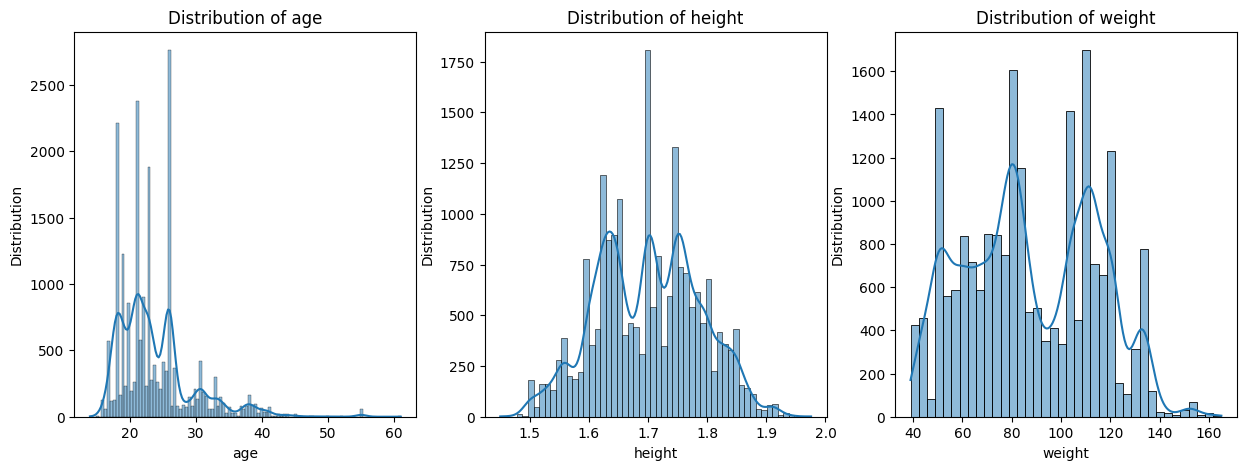

In [16]:
features = ['age', 'height', 'weight']

for i in features:
    skewness(train_data, i)    

plot_distribution(train_data, features)

Skewness of the  age  =  0.8334430805394183
The distribution is right-skewed.
Skewness of the  height  =  -0.09557196723719696
The distribution is left-skewed.
Skewness of the  weight  =  -0.37138342181621603
The distribution is left-skewed.


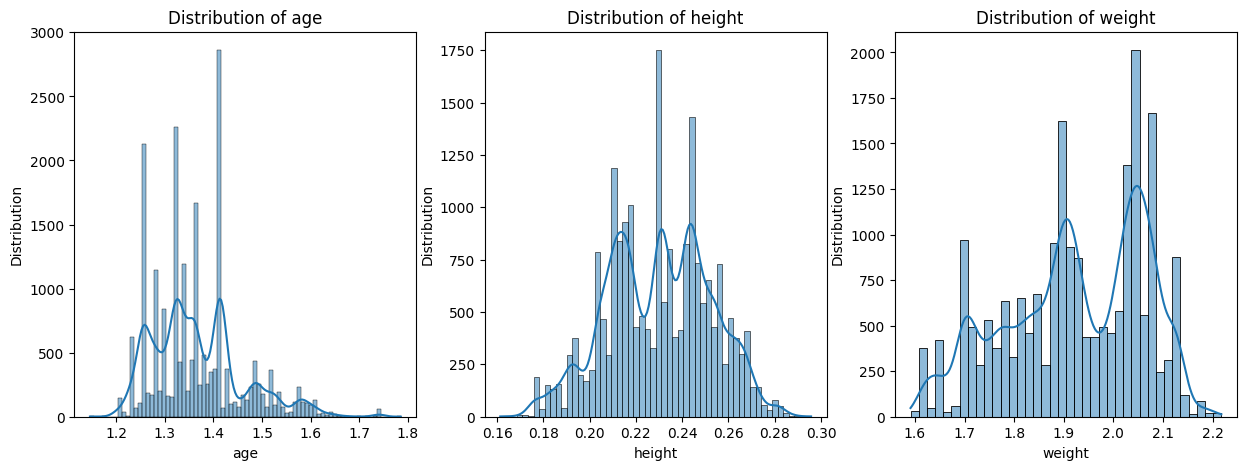

In [17]:
df = train_data.copy()

for i in features:
    df[i] = np.log10(df[i])

for i in features:
    skewness(df, i)
plot_distribution(df, features)

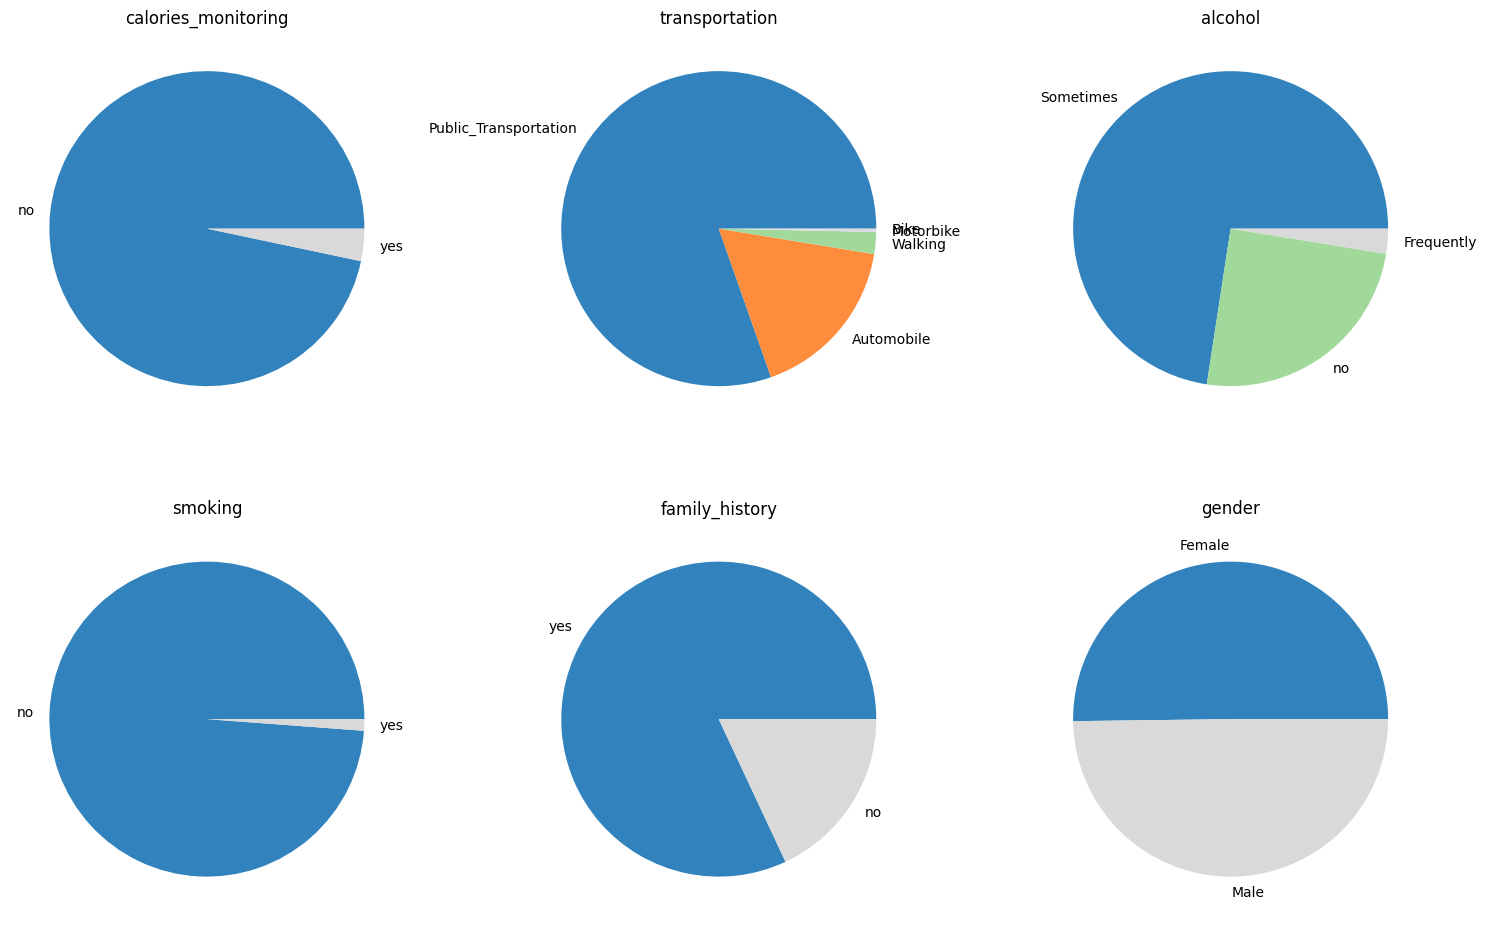

In [18]:
Features = ['calories_monitoring', 'transportation', 'alcohol', 'smoking', 'family_history', 'gender']

# Define the color palette
colors = plt.get_cmap('tab20c')

# Create subplots for each category
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, feature in enumerate(Features):
    counts = train_data[feature].value_counts()
    axes[i].pie(counts, labels=counts.index, colors=colors(np.linspace(0, 1, len(counts))))
    axes[i].set_title(feature)

plt.tight_layout()
plt.show()

In [19]:
def bar_chart(data, features):
    fig, ax = plt.subplots(2, 3, figsize=(23, 15))

    for i, feature in enumerate(features):
        
        row = i // 3
        col = i % 3
        axe = ax[row, col]
        sns.barplot(
            data=data,
            y='obesity',
            x=feature,
            estimator='sum',
            ax=axe,
        )
        
        axe.set_title("Bar of " + feature)
        axe.set_ylabel(feature)
        axe.set_xlabel('Count')

    ax[1, 2].remove()    
    plt.show()
    return

In [20]:
train_data.obesity.value_counts()

obesity
Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: count, dtype: int64

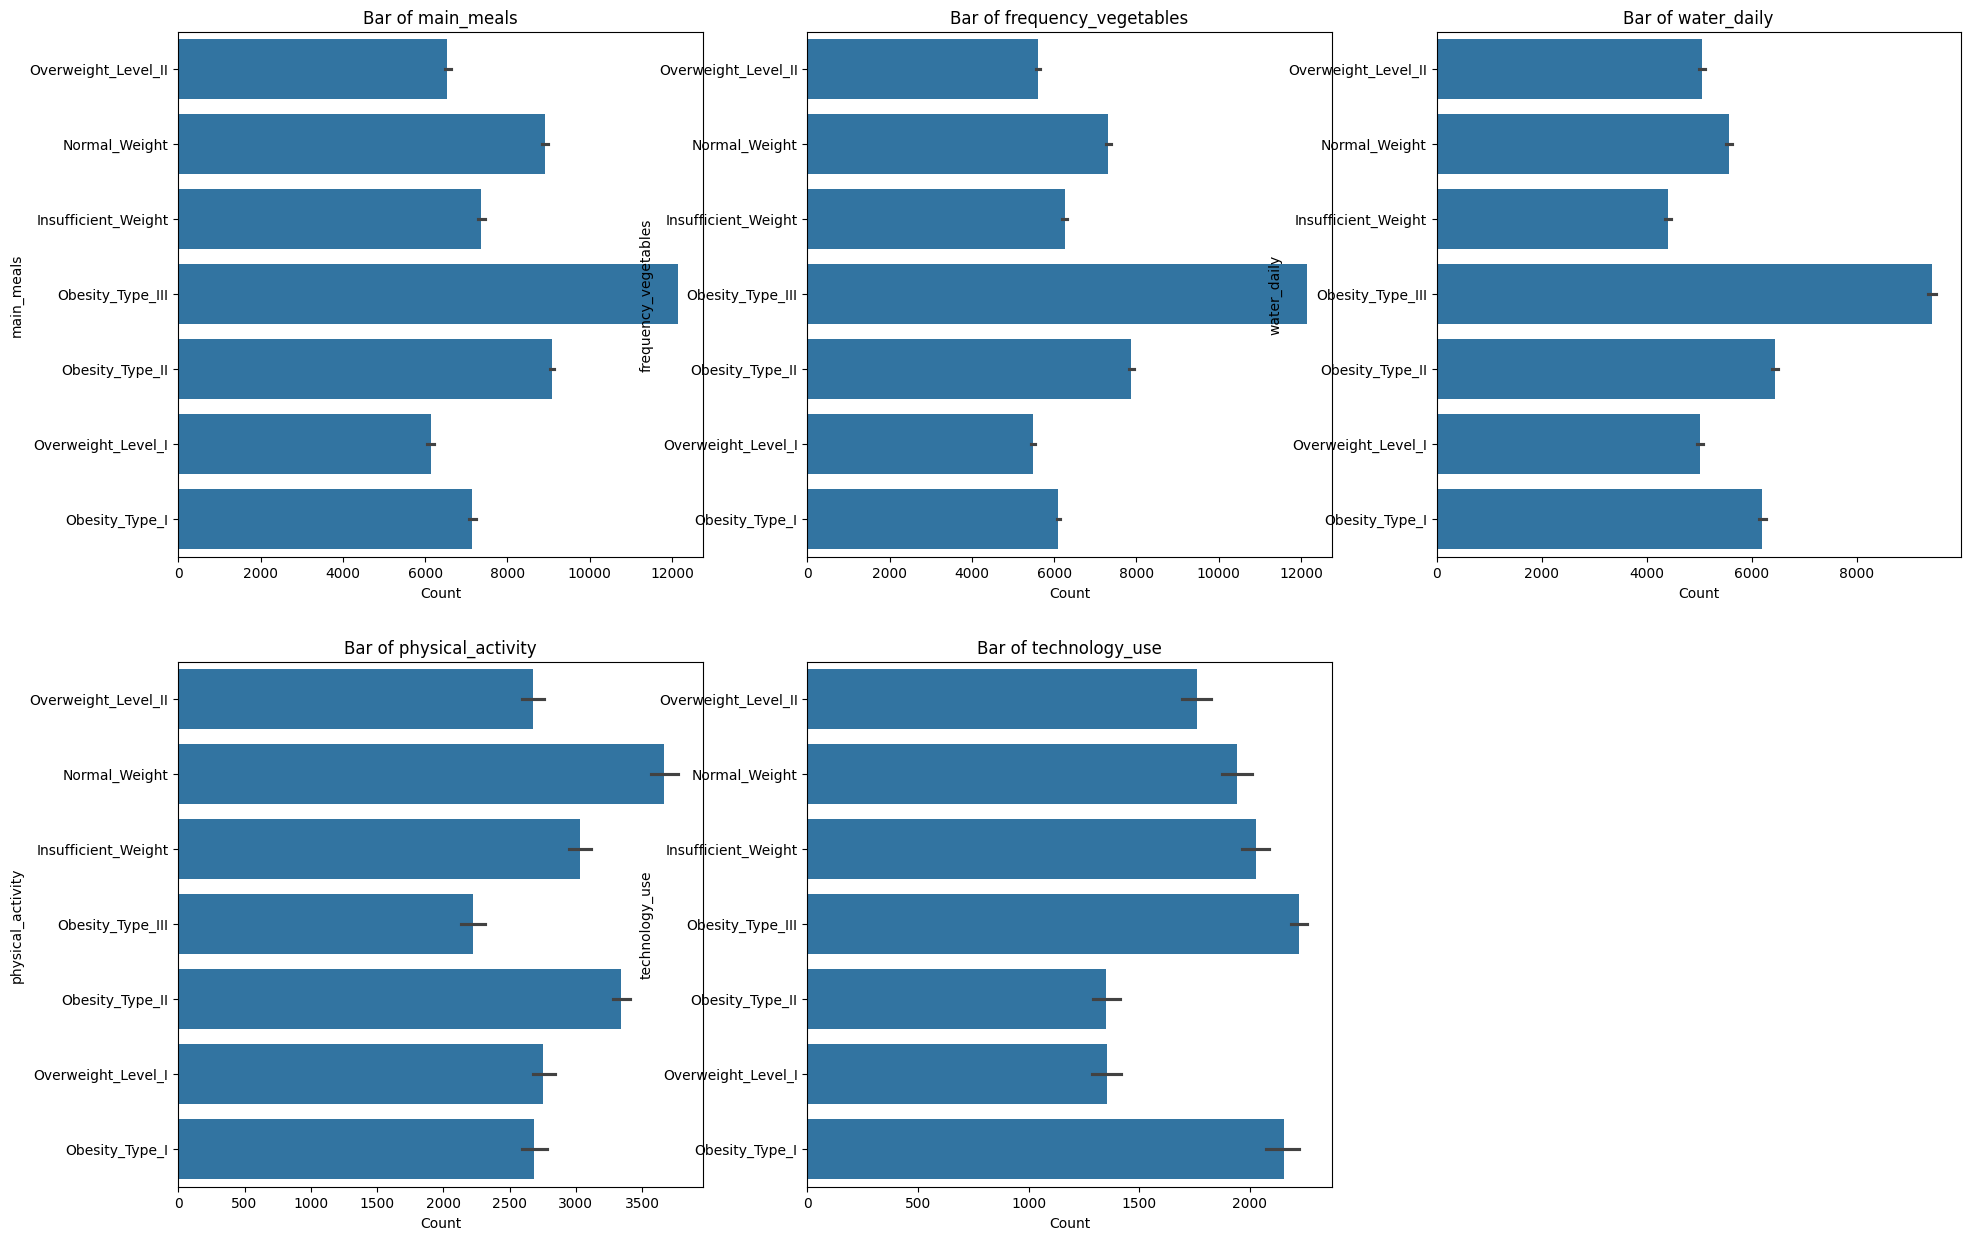

In [21]:
features = ['main_meals','frequency_vegetables' ,'water_daily', 'physical_activity', 'technology_use']
bar_chart(train_data, features)

In [22]:
def box_plot(data, features):
    fig, ax = plt.subplots(3, 3, figsize=(20, 10))

    for i, feature in enumerate(features):
        row = i // 3
        col = i % 3
        axe = ax[row, col]
        sns.boxplot(data=data, x=feature, ax=axe)
        axe.set_title("Box plot of " + feature)
        axe.set_xlabel("obesity")
        axe.set_ylabel(feature)
    ax[2, 2].remove()
    plt.show()
    return

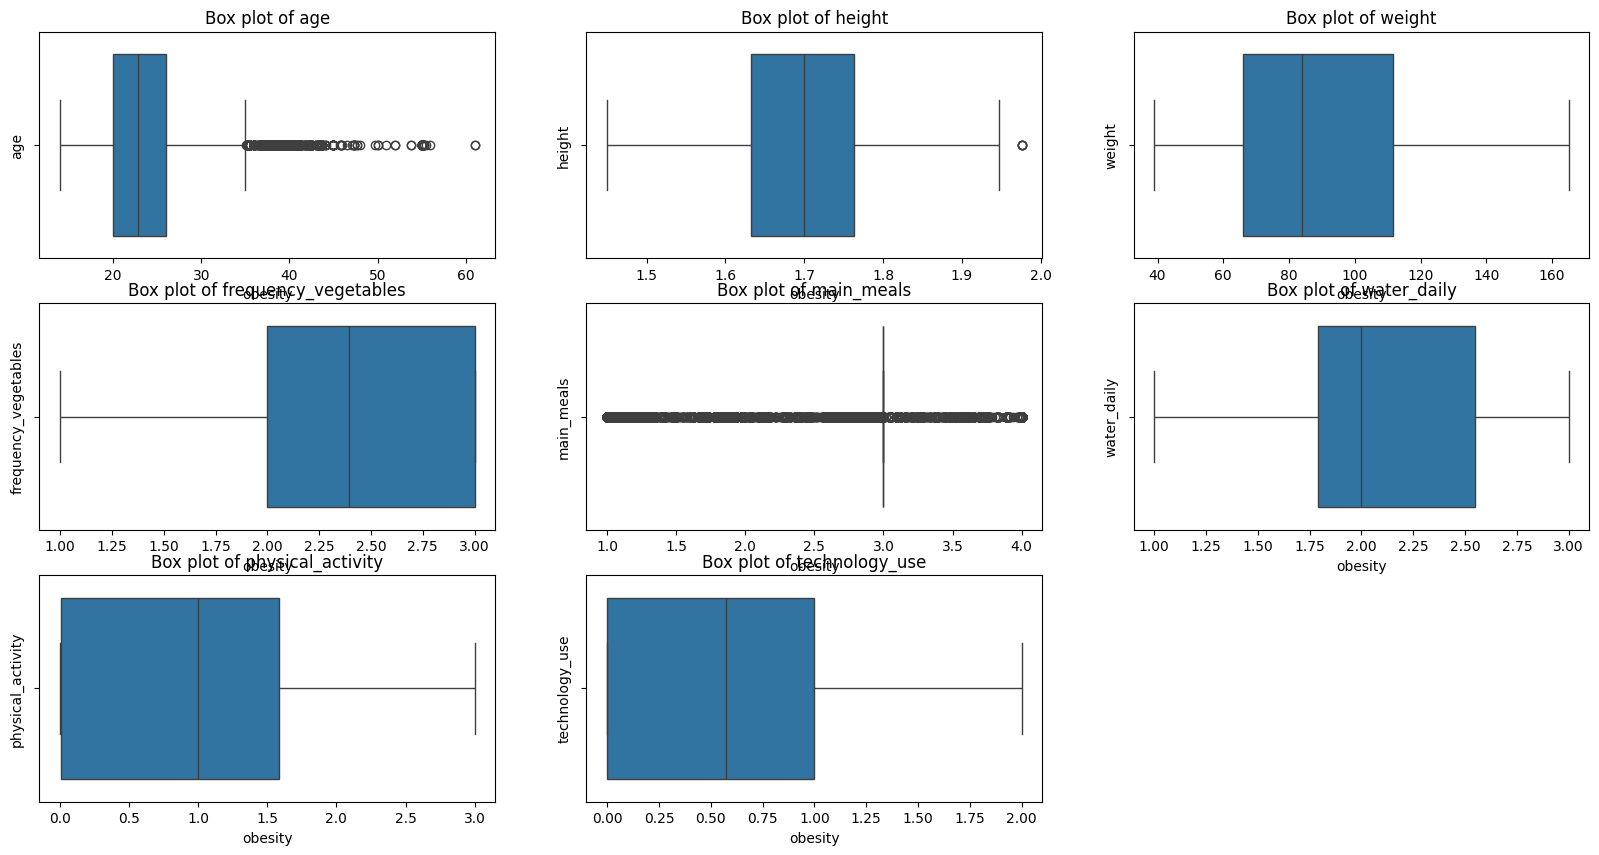

In [23]:
feature = []

for i in train_data.columns:
    if train_data[i].dtype != 'O' and i != 'id' and i != 'obesity':
        feature.append(i)


box_plot(train_data, feature)

In [24]:
test_data.shape

(13840, 17)

In [25]:
train_data.shape

(20758, 18)

## 7) Transformação de Features

In [26]:
def get_outliers(data ,feature):
    
    Q1 = data[feature].quantile(0.25)
    Q2 = data[feature].quantile(0.75)
    iqr = Q2 - Q1
    lower_limit = Q1 - 1.5 * iqr
    upper_limit = Q2 + 1.5 * iqr
    IQR_df = data[
        (data[feature] < lower_limit) | (data[feature] > upper_limit)
    ]

    return (len(IQR_df)), lower_limit, upper_limit

In [27]:
feature = []

for i in train_data.columns:
    if train_data[i].dtype != 'O' and i != 'id' and i != 'obesity':
        feature.append(i)

print(len(train_data))

feature.remove('age')
feature.remove('main_meals')
for feat in feature:
    outliers, lower_limit, upper_limit = get_outliers(train_data, feat)
    print(
        "The number of outliers in the feature",
        feat,
        " = ",
        outliers,
        " with lower limit = ",
        lower_limit,
        " and upper limit = ",
        upper_limit,
    )
    
    if outliers > 0:
        train_data = train_data[
            (train_data[feat] > lower_limit) & (train_data[feat] < upper_limit)
        ]


print(len(train_data))

20758
The number of outliers in the feature height  =  4  with lower limit =  1.4353094999999998  and upper limit =  1.9594335000000003
The number of outliers in the feature weight  =  0  with lower limit =  -2.4008295000000146  and upper limit =  180.00138250000003
The number of outliers in the feature frequency_vegetables  =  0  with lower limit =  0.5  and upper limit =  4.5
The number of outliers in the feature water_daily  =  0  with lower limit =  0.6556295000000001  and upper limit =  3.6860095
The number of outliers in the feature physical_activity  =  0  with lower limit =  -2.3610765000000002  and upper limit =  3.9564955000000004
The number of outliers in the feature technology_use  =  0  with lower limit =  -1.5  and upper limit =  2.5
20754


## 8) Construção de features

BMI = weight / height

do_physical_activity = physical_activity > 0 (binary column)

perfect_weight = abs(height - weight) <= 5

up_age_25 = age >= 25

over_all_meals = frequency_vegetables + main_meals

In [28]:
class Feature_Construction(BaseEstimator, TransformerMixin):
    def __init__(self) -> None:
        super().__init__()
        return

    def fit(self, X, y=None):
        return self

    def __feature_construction(self, X):
        X["BMI"] = X["weight"] / X["height"]
        X["do_physical_activity"] = X["physical_activity"] > 0
        X["up_age_25"] = X["age"] > 25
        X["over_all_meals"] = X["main_meals"] + X["frequency_vegetables"]

        def get(x):
            x = str(x)
            x = x[2:4]
            x = int(x)
            return x

        X["perfect_weight"] = abs(X["height"].apply(get) - X["weight"]) <= 5
        for col in X.columns:
            if X[col].dtype == "bool":
                X[col] = X[col].astype("float")
        return X

    def transform(self, X, y=None):
        X = self.__feature_construction(X)
        return X

## 9) Encoding

In [29]:
class Encode(BaseEstimator, TransformerMixin):
    def __init__(self) -> None:
        super().__init__()
        return

    def fit(self, X, y=None):
        return self

    def __dummy(self, X):
        features = [
            "gender",
            "family_history",
            "frequency_high_caloric_food",
            "eating_out_main_meals",
            "smoking",
            "calories_monitoring",
            "alcohol",
            "transportation",
        ]

        X = pd.get_dummies(data=X, columns=features, drop_first=True)
        return X

    def transform(self, X, y=None):
        X = self.__dummy(X)

        for col in X.columns:
            if X[col].dtype == "bool":
                X[col] = X[col].astype("float")
        return X

## 10) Splitting

In [30]:
features = train_data.drop(columns=['obesity', 'id'], axis=1)
test = train_data['obesity']

x_train, x_test, y_train, y_test = train_test_split(
    features, test, test_size=0.35, random_state=42
)
leb_enc = LabelEncoder()

In [1]:
def evaluation(model, x_train, x_test, y_train, y_test):
    train_predict = model.predict(x_train)
    test_predict = model.predict(x_test)

    train_cm = confusion_matrix(y_true=y_train, y_pred=train_predict)
    test_cm = confusion_matrix(y_true=y_test, y_pred=test_predict)

    train_acc = model.score(x_train, y_train)
    test_acc = model.score(x_test, y_test)

    return train_cm, test_cm, train_acc, test_acc

def heat_map(test_cm, train_cm):

    fig, ax = plt.subplots(1, 2, figsize=(10, 8))

    sns.heatmap(test_cm, annot=True, cmap="Blues", fmt='d', cbar=False, ax=ax[0])
    ax[0].set_title("test confusion matrix")
    ax[0].set_xlabel("predicted")
    ax[0].set_ylabel("actual")
    sns.heatmap(train_cm, annot=True, cmap="Blues",fmt='d', cbar=False, ax=ax[1])
    ax[1].set_title("train confusion matrix")
    ax[1].set_xlabel("predicted")
    ax[1].set_ylabel("actual")
    return

## 11) RandomForestClassifier(RFC)

In [32]:
fc = Feature_Construction()
en = Encode()
rf = RandomForestClassifier(
    n_estimators=250,
    ccp_alpha=.00015,
    random_state=42,
)
pip_rf = Pipeline(
    [
        ("Feature_Construction", fc),
        ("Encode", en),
        ('RandomForestClassifier', rf)
    ]
)

pip_rf.fit(x_train, y_train)

Pipeline(steps=[('Feature_Construction', Feature_Construction()),
                ('Encode', Encode()),
                ('RandomForestClassifier',
                 RandomForestClassifier(ccp_alpha=0.00015, n_estimators=250,
                                        random_state=42))])

In [33]:
train_cm, test_cm, train_acc, test_acc = evaluation(pip_rf, x_train, x_test, y_train, y_test)

In [34]:
train_acc, test_acc

(0.9527798369162342, 0.8953744493392071)

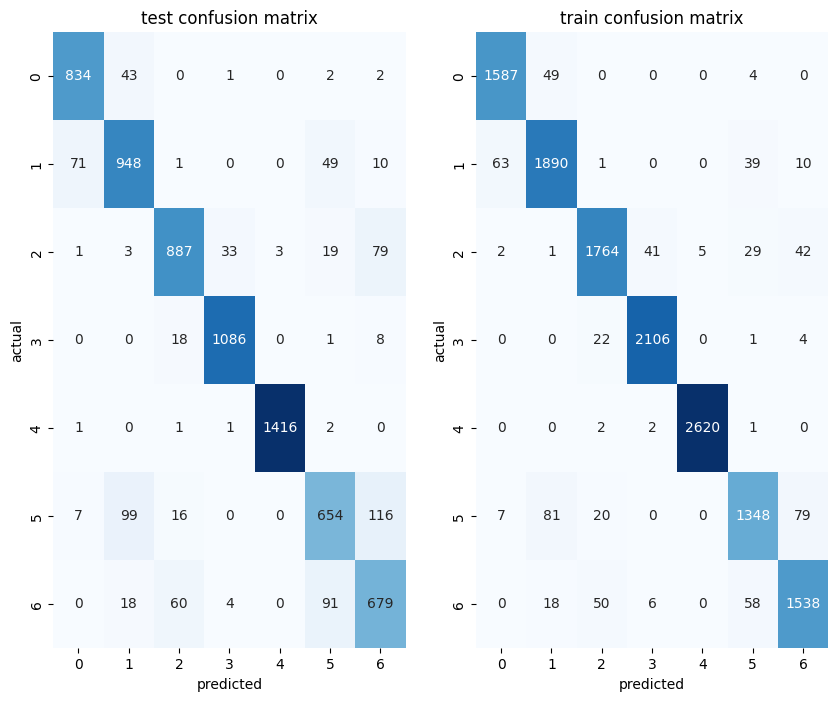

In [35]:
heat_map(test_cm, train_cm)

In [36]:
data = {
    "model": "RandomForestClassifier",
    "train_score": train_acc,
    "test_score": test_acc,
}
used_models.loc[len(used_models)] = data
used_models

,model,train_score,test_score
0,RandomForestClassifier,0.95278,0.895374


In [37]:
train_data.shape, test_data.shape, sample_data.shape

((20754, 18), (13840, 17), (13840, 2))

## 12) DecisionTreeClassifier

In [38]:
fc = Feature_Construction()
en = Encode()
dt = DecisionTreeClassifier(
    random_state=2024
)
pip_dt = Pipeline(
    [
        ("Feature_Construction", fc),
        ("Encode", en),
        ('DecisionTreeClassifier', dt)
    ]
)

pip_dt.fit(x_train, y_train)

Pipeline(steps=[('Feature_Construction', Feature_Construction()),
                ('Encode', Encode()),
                ('DecisionTreeClassifier',
                 DecisionTreeClassifier(random_state=2024))])

In [39]:
train_cm, test_cm, train_acc, test_acc = evaluation(pip_dt, x_train, x_test, y_train, y_test)

In [40]:
train_acc, test_acc

(1.0, 0.8398953744493393)

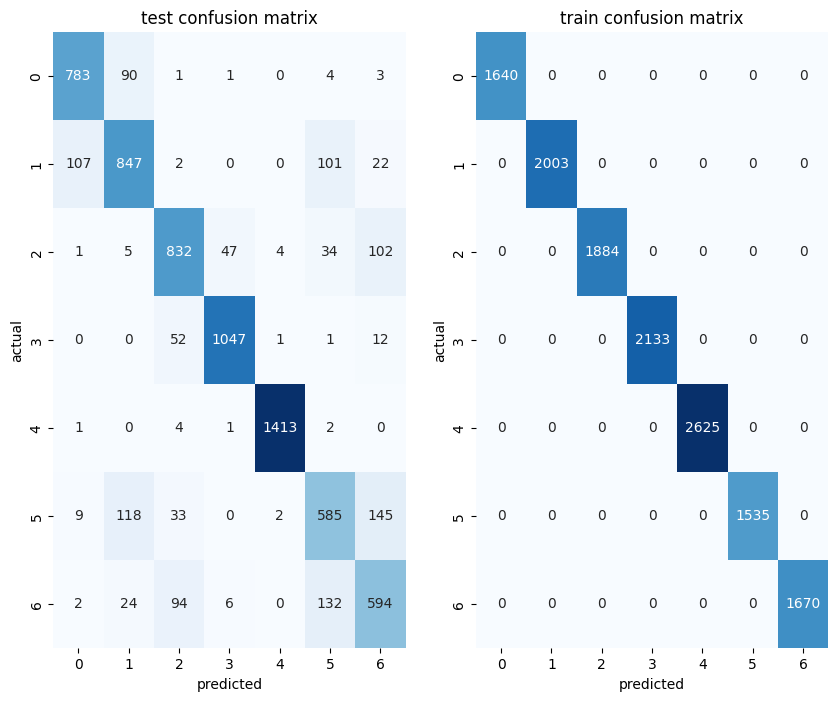

In [41]:
heat_map(test_cm, train_cm)

In [42]:
data = {
    "model": "DecisionTreeClassifier",
    "train_score": train_acc,
    "test_score": test_acc,
}
used_models.loc[len(used_models)] = data
used_models

,model,train_score,test_score
0,RandomForestClassifier,0.95278,0.895374
1,DecisionTreeClassifier,1.00000,0.839895


In [43]:
train_data.shape, test_data.shape, sample_data.shape

((20754, 18), (13840, 17), (13840, 2))

## 13) Multinomial Naive-Bayes

In [44]:
fc = Feature_Construction()
en = Encode()
nb = MultinomialNB(
    alpha=1.0
)
pip_nb = Pipeline(
    [
        ("Feature_Construction", fc),
        ("Encode", en),
        ('MultinomialNaiveBayes', nb)
    ]
)

pip_nb.fit(x_train, y_train)

Pipeline(steps=[('Feature_Construction', Feature_Construction()),
                ('Encode', Encode()),
                ('MultinomialNaiveBayes', MultinomialNB())])

In [45]:
train_cm, test_cm, train_acc, test_acc = evaluation(pip_nb, x_train, x_test, y_train, y_test)

In [46]:
train_acc, test_acc

(0.6835433654558932, 0.6793777533039648)

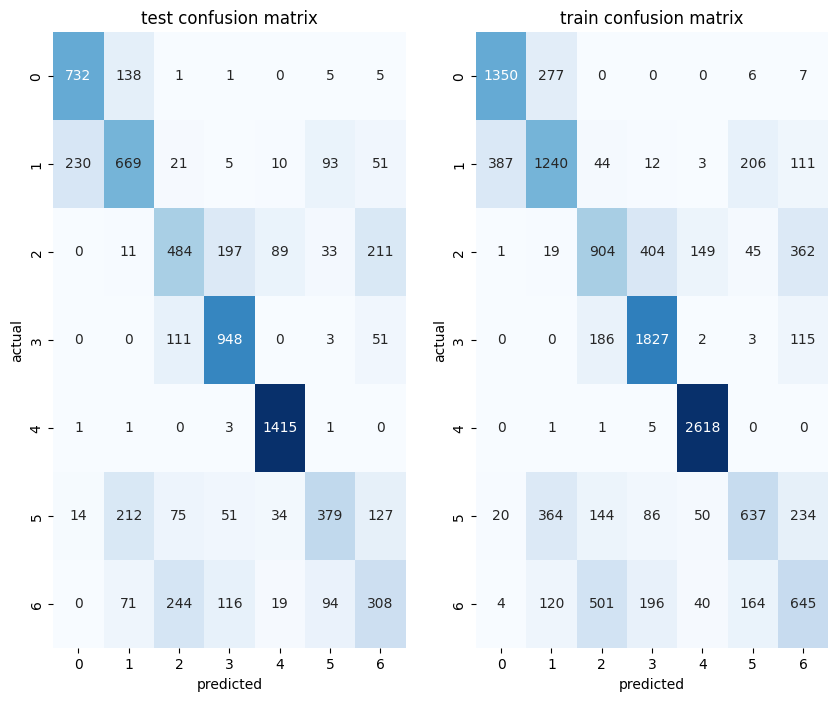

In [47]:
heat_map(test_cm, train_cm)

In [48]:
data = {
    "model": "MultinomialNaiveBayes",
    "train_score": train_acc,
    "test_score": test_acc,
}
used_models.loc[len(used_models)] = data
used_models

,model,train_score,test_score
0,RandomForestClassifier,0.952780,0.895374
1,DecisionTreeClassifier,1.000000,0.839895
2,MultinomialNaiveBayes,0.683543,0.679378


In [49]:
train_data.shape, test_data.shape, sample_data.shape

((20754, 18), (13840, 17), (13840, 2))

## 14) LightGBM

In [50]:
fc = Feature_Construction()
en = Encode()
lgbm = LGBMClassifier(
    objective='multiclass',
    boosting_type='gbdt',
    num_class=7,
    learning_rate=.01,
    n_estimators=500,
    max_depth=11
)

pip_lgbm = Pipeline(
    steps=[
        ("Feature_Construction", fc),
        ("Encode", en),
        ("LGBMClassifier", lgbm),
    ]
)

pip_lgbm.fit(x_train, y_train)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001340 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2562
[LightGBM] [Info] Number of data points in the train set: 13490, number of used features: 26
[LightGBM] [Info] Start training from score -2.107252
[LightGBM] [Info] Start training from score -1.907303
[LightGBM] [Info] Start training from score -1.968551
[LightGBM] [Info] Start training from score -1.844419
[LightGBM] [Info] Start training from score -1.636868
[LightGBM] [Info] Start training from score -2.173418
[LightGBM] [Info] Start training from score -2.089125


Pipeline(steps=[('Feature_Construction', Feature_Construction()),
                ('Encode', Encode()),
                ('LGBMClassifier',
                 LGBMClassifier(learning_rate=0.01, max_depth=11,
                                n_estimators=500, num_class=7,
                                objective='multiclass'))])

In [51]:
train_cm, test_cm, train_acc, test_acc = evaluation(
    pip_lgbm, x_train, x_test, y_train, y_test
)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


In [52]:
train_acc, test_acc

(0.9595997034840623, 0.9008810572687225)

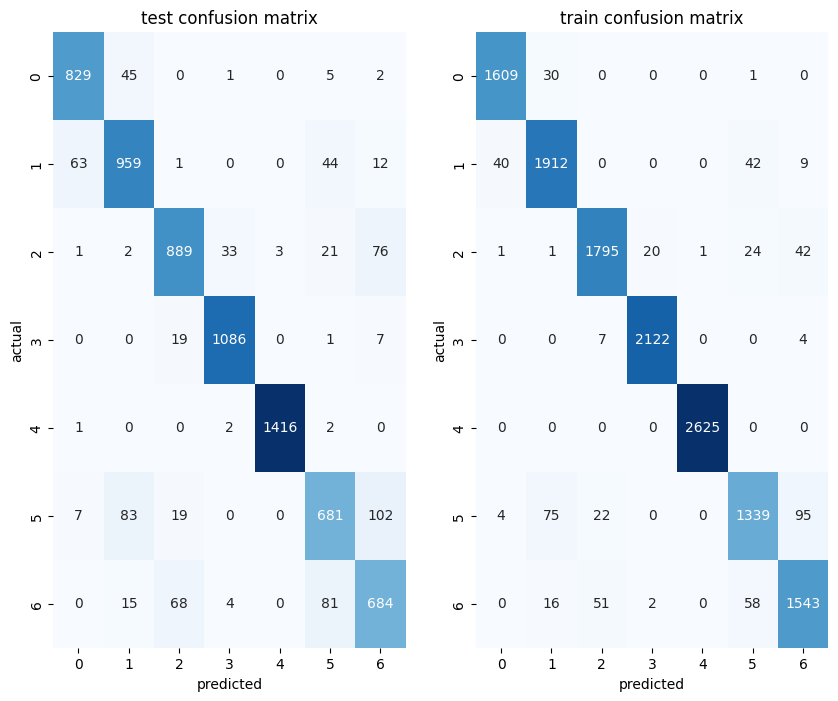

In [53]:
heat_map(test_cm, train_cm)

In [54]:
data = {
    "model": "lgbm",
    "train_score": train_acc,
    "test_score": test_acc,
}
used_models.loc[len(used_models)] = data
used_models

,model,train_score,test_score
0,RandomForestClassifier,0.952780,0.895374
1,DecisionTreeClassifier,1.000000,0.839895
2,MultinomialNaiveBayes,0.683543,0.679378
3,lgbm,0.959600,0.900881


## 15) Voting System Classifier (VSC)

In [55]:
vot_system = VotingClassifier(
    estimators=[
        ("rf", pip_rf),
        ("dt", pip_dt),
        ("nb", pip_nb),
    ],
)
vot_system.fit(x_train, y_train)

VotingClassifier(estimators=[('rf',
                              Pipeline(steps=[('Feature_Construction',
                                               Feature_Construction()),
                                              ('Encode', Encode()),
                                              ('RandomForestClassifier',
                                               RandomForestClassifier(ccp_alpha=0.00015,
                                                                      n_estimators=250,
                                                                      random_state=42))])),
                             ('dt',
                              Pipeline(steps=[('Feature_Construction',
                                               Feature_Construction()),
                                              ('Encode', Encode()),
                                              ('DecisionTreeClassifier',
                                               DecisionTreeClassifier(random_state=2024))])),
                             ('nb',
                              Pipeline(steps=[('Feature_Construction',
                                               Feature_Construction()),
                                              ('Encode', Encode()),
                                              ('MultinomialNaiveBayes',
                                               MultinomialNB())]))])

In [56]:
train_cm, test_cm, train_acc, test_acc = evaluation(
    vot_system, x_train, x_test, y_train, y_test
)

In [57]:
train_acc, test_acc

(0.9661230541141587, 0.8718337004405287)

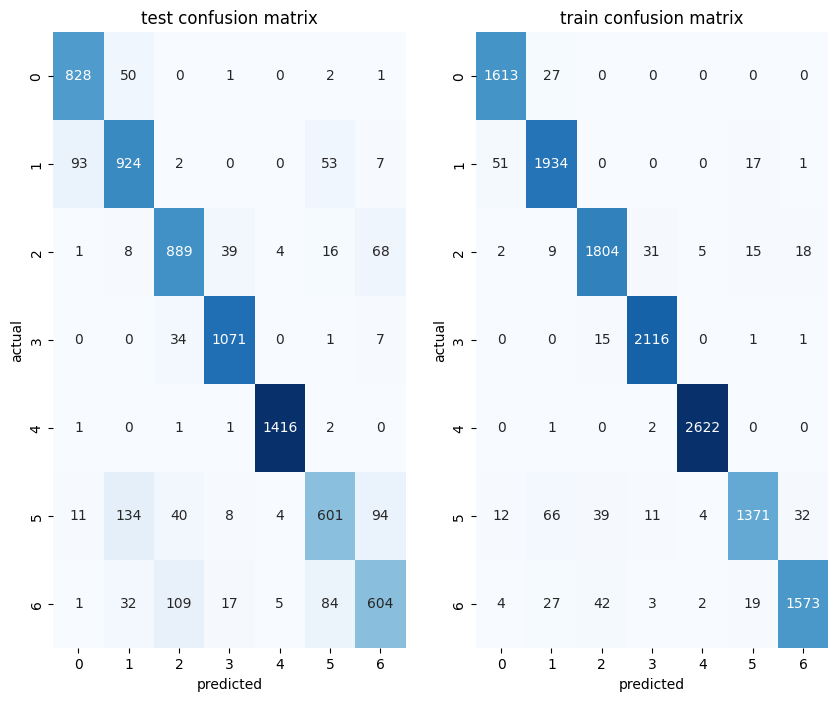

In [58]:
heat_map(test_cm, train_cm)

In [59]:
data = {
    "model": "vot",
    "train_score": train_acc,
    "test_score": test_acc,
}
used_models.loc[len(used_models)] = data
used_models

,model,train_score,test_score
0,RandomForestClassifier,0.952780,0.895374
1,DecisionTreeClassifier,1.000000,0.839895
2,MultinomialNaiveBayes,0.683543,0.679378
3,lgbm,0.959600,0.900881
4,vot,0.966123,0.871834


## 16) K-Nearest Neighbors (K-NN)

In [60]:
fc = Feature_Construction()
en = Encode()
knn = KNeighborsClassifier()

pip_knn = Pipeline(
    steps=[
        ("Feature_Construction", fc),
        ("Encode", en),
        ("KNN", knn),
    ]
)

pip_knn.fit(x_train, y_train)

Pipeline(steps=[('Feature_Construction', Feature_Construction()),
                ('Encode', Encode()), ('KNN', KNeighborsClassifier())])

In [61]:
train_cm, test_cm, train_acc, test_acc = evaluation(
    pip_knn, x_train, x_test, y_train, y_test
)

In [62]:
train_acc, test_acc

(0.9030392883617494, 0.8737610132158591)

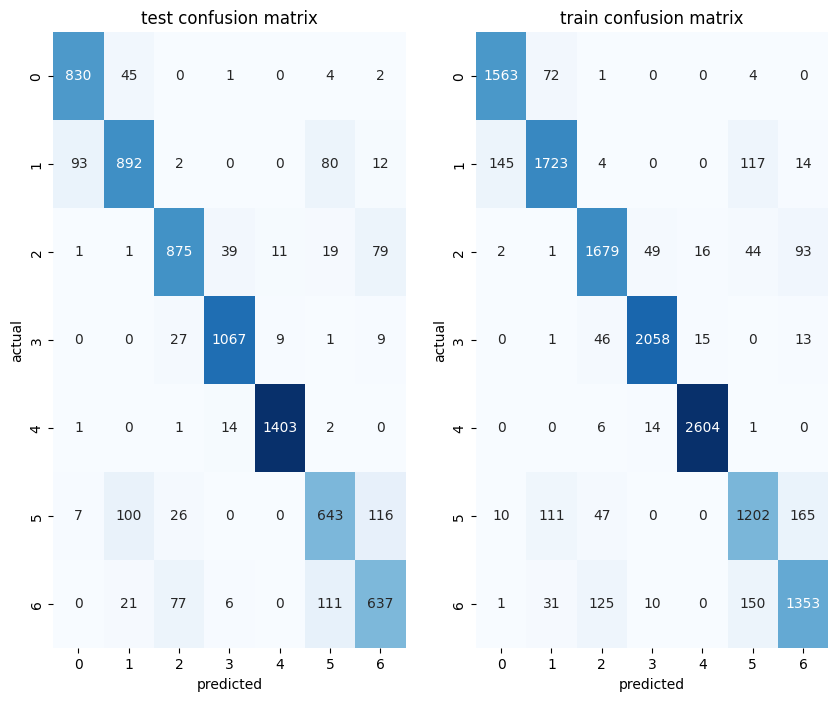

In [63]:
heat_map(test_cm, train_cm)

In [64]:
data = {
    "model": "KNearestNeighbors",
    "train_score": train_acc,
    "test_score": test_acc,
}
used_models.loc[len(used_models)] = data
used_models

,model,train_score,test_score
0,RandomForestClassifier,0.952780,0.895374
1,DecisionTreeClassifier,1.000000,0.839895
2,MultinomialNaiveBayes,0.683543,0.679378
3,lgbm,0.959600,0.900881
4,vot,0.966123,0.871834
5,KNearestNeighbors,0.903039,0.873761


## 17) Análise final dos modelos

In [65]:
used_models.sort_values(by=['test_score'], ascending=[False])

,model,train_score,test_score
3,lgbm,0.959600,0.900881
0,RandomForestClassifier,0.952780,0.895374
5,KNearestNeighbors,0.903039,0.873761
4,vot,0.966123,0.871834
1,DecisionTreeClassifier,1.000000,0.839895
2,MultinomialNaiveBayes,0.683543,0.679378


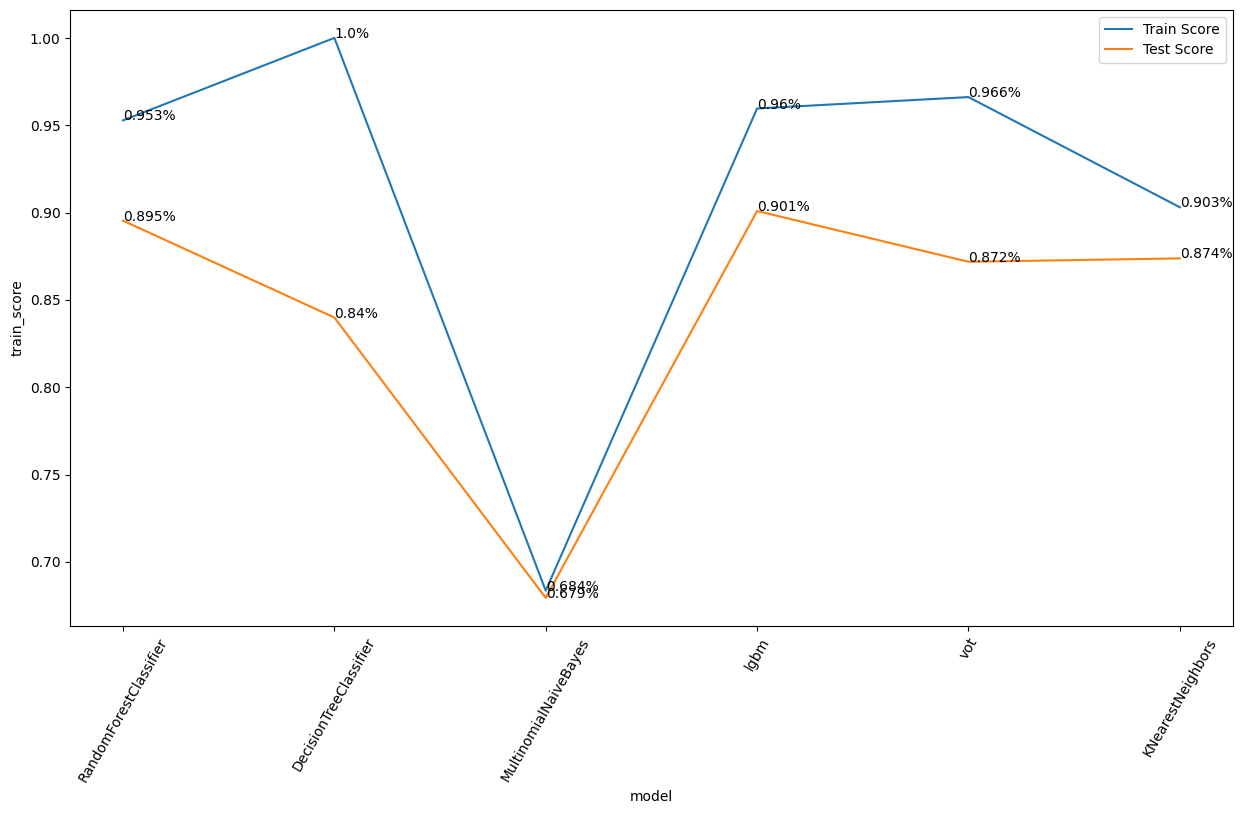

In [66]:
plt.figure(figsize=(15, 8))
sns.lineplot(y=used_models["train_score"], x=used_models["model"], label="Train Score")
for i in range(len(used_models)):
    plt.text(
        i, used_models["train_score"][i], f'{round(used_models["train_score"][i],3)}%'
    )

sns.lineplot(y=used_models["test_score"], x=used_models["model"], label="Test Score")

plt.xticks(rotation=60)

# displaying the percentage of each model in the plot
for i in range(len(used_models)):
    plt.text(i, used_models["test_score"][i], f'{round(used_models["test_score"][i],3)}%')

## 18) Submission

In [67]:
def convert(data):
    if data == 0:
        return "Insufficient_Weight"
    if data == 1:
        return "Normal_Weight"
    if data == 2:
        return "Obesity_Type_I"
    if data == 3:
        return "Obesity_Type_II"
    if data == 4:
        return "Obesity_Type_III"
    if data == 5:
        return "Overweight_Level_I"
    if data == 6:
        return "Overweight_Level_II"

Id = test_data['id']
def get(val):
    if val == 'Always':
        return 'Frequently'
    return val
test_data['alcohol'] = test_data['alcohol'].apply(get)
data = test_data.drop(columns=['id'])
prid = pip_lgbm.predict(data)
submmition = pd.DataFrame({"id": Id, "NObeyesdad": prid})
submmition.to_csv(r'C:\Users\wpett\OneDrive\Desktop\UFRJ\2024.1\Mineração de Dados - Zimbrão\submission.csv', index=False)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
